## Exploratory Data Analysis for FoodWheel Company
***

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

- What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
- How has the average order amount changed over time? What does this say about the trajectory of the company?
- How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?


## Inspecting restaurant data

In [1]:
import pandas as pd

restaurant_df = pd.read_csv("data/restaurants.csv")

restaurant_df.head(10)

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza
5,6,Buddha Bodai,Chinatown,Vegetarian
6,7,Nan Xiang Xiao Long Bao,Queens,Chinese
7,8,Mission Chinese Food,Downtown,Chinese
8,9,Baohaus,Downtown,Chinese
9,10,al di la Trattoria,Brooklyn,Italian


### Shape

In [2]:
nr_rows, nr_columns = restaurant_df.shape

print("Number of rows: ", nr_rows)
print("Number of columns: ", nr_columns)

Number of rows:  44
Number of columns:  4


### Data types

In [3]:
restaurant_df.dtypes

id               int64
name            object
neighborhood    object
cuisine         object
dtype: object

### Missing values

In [4]:
restaurant_df.isnull().sum()

id              0
name            0
neighborhood    0
cuisine         0
dtype: int64

### Distinct values

In [5]:
cuisine_unique_values = restaurant_df.cuisine.unique()
print("Distinct values for cuisine column: ", *cuisine_unique_values, sep="\n")

neighborhood_unique_values = restaurant_df.neighborhood.unique()
print("Distinct values for neighborhood column: ", *neighborhood_unique_values, sep="\n")

Distinct values for cuisine column: 
Korean
Chinese
Pizza
Vegetarian
Italian
Japanese
American
Distinct values for neighborhood column: 
Midtown
Chinatown
Brooklyn
Queens
Downtown
Uptown
UWS


In [6]:
restaurant_df[["name", "neighborhood", "cuisine"]] = restaurant_df[["name", "neighborhood", "cuisine"]].astype("string")

restaurant_df.dtypes

id               int64
name            string
neighborhood    string
cuisine         string
dtype: object

## Analyzing FoodWheel Cuisines

The board wants to make sure that FoodWheel offers a wide variety of restaurants. Having many different options makes customers more likely to come back.

- What cuisines does FoodWheel offer?
- Which areas should the company search for more restaurants to partner with?

In [7]:
cuisine_by_type = restaurant_df.groupby("cuisine").name.count().reset_index()

cuisine_by_type.head(10)

,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


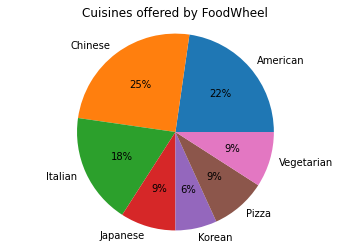

In [8]:
import matplotlib.pyplot as plt

plt.pie(
    x=cuisine_by_type.name.values,
    labels=cuisine_by_type.cuisine.values,
    autopct="%d%%"
    )

plt.axis("equal")
plt.title("Cuisines offered by FoodWheel")
plt.show()

## Inspecting orders data

In [9]:
orders_df = pd.read_csv("data/orders.csv")

orders_df.head(10)

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0
5,6,43,6-7-2017,18.0
6,7,8,6-25-2017,19.0
7,8,104,4-8-2017,8.0
8,9,136,9-6-2017,32.0
9,10,116,4-10-2017,15.0


### Shape

In [10]:
nr_rows, nr_columns = orders_df.shape

print("Number of rows: ", nr_rows)
print("Number of columns: ", nr_columns)

Number of rows:  500
Number of columns:  4


### Data types

In [11]:
orders_df.dtypes

id               int64
customer_id      int64
date            object
price          float64
dtype: object

### Missing values

In [12]:
orders_df.isnull().sum()

id             0
customer_id    0
date           0
price          0
dtype: int64

## Preprocessing orders data

In [13]:
orders_df["date"] = orders_df["date"].astype("datetime64")
orders_df["day"] = orders_df["date"].dt.day
orders_df["month"] = orders_df["date"].dt.month
orders_df["year"] = orders_df["date"].dt.year

orders_df.head(10)

,id,customer_id,date,price,day,month,year
0,1,61,2017-06-18,13.0,18,6,2017
1,2,210,2017-05-08,21.0,8,5,2017
2,3,0,2017-09-07,33.0,7,9,2017
3,4,66,2017-07-07,19.0,7,7,2017
4,5,65,2017-04-26,13.0,26,4,2017
5,6,43,2017-06-07,18.0,7,6,2017
6,7,8,2017-06-25,19.0,25,6,2017
7,8,104,2017-04-08,8.0,8,4,2017
8,9,136,2017-09-06,32.0,6,9,2017
9,10,116,2017-04-10,15.0,10,4,2017


## Visualizing Orders over Time

FoodWheel is a relatively new start up.  They launched one year ago, and have grown more popular since then.  Management suspects that the average order size has increased over time. Create a bar plot that demonstrates the trend in average order size over time.

- How has the average order amount changed over time? What does this say about the trajectory of the company?


In [14]:
orders_by_date = orders_df.groupby("month").price.mean().reset_index()

orders_by_date

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [15]:
std_order = orders_df.groupby("month").price.std().reset_index()

std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


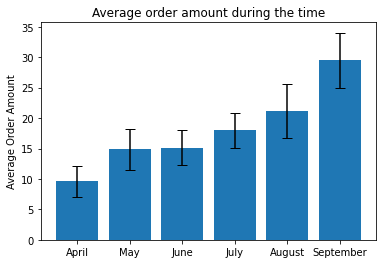

In [16]:
ax = plt.subplot()

plt.bar(
    range(len(orders_by_date)),
    orders_by_date.price,
    yerr=std_order.price,
    capsize=5.0
)

ax.set_xticks(range(len(orders_by_date)))
ax.set_xticklabels(["April", "May", "June", "July", "August", "September"])
plt.ylabel("Average Order Amount")
plt.title("Average order amount during the time")
plt.show()

## Analyze Customer types

There is a range of amounts that customers spend at FoodWheel.  Create a histogram of the amount spent by each customer over the past six months with the following format:

In [17]:
orders_by_customer = orders_df.groupby("customer_id").price.sum().reset_index()

orders_by_customer

,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0
...,...,...
219,245,68.0
220,246,16.0
221,247,35.0
222,248,89.0


Text(0.5, 1.0, 'The amount spent by each customer over the past six months')

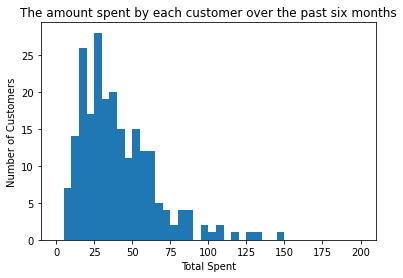

In [18]:
plt.hist(
    orders_by_customer.price.values,
    range=(0, 200),
    bins=40
    )

plt.xlabel("Total Spent")
plt.ylabel("Number of Customers")
plt.title("The amount spent by each customer over the past six months")

## Analyzing restaurants by neighborhood

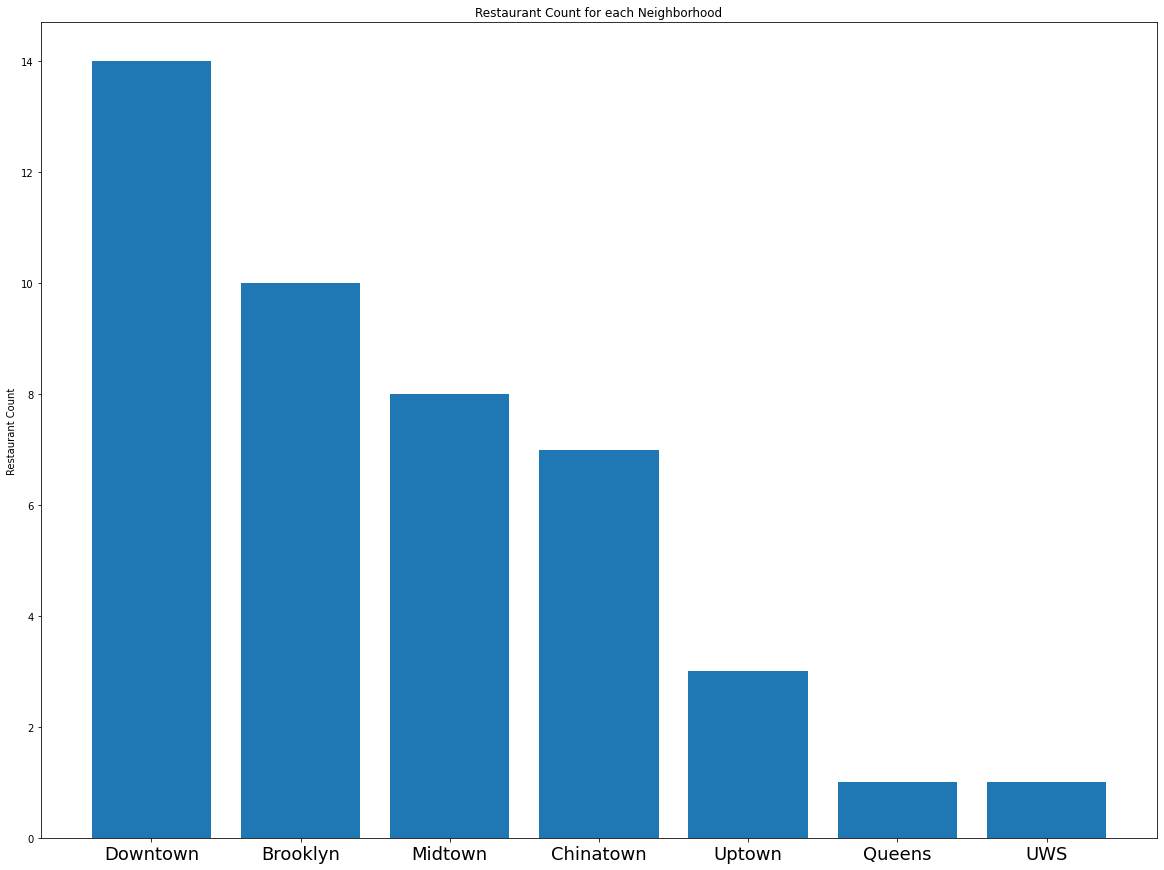

In [19]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.bar(
    restaurant_df["neighborhood"].unique(),
    restaurant_df["neighborhood"].value_counts().values,
    capsize=5
)

ax.set_xticks(range(len(restaurant_df["neighborhood"].unique())))
ax.set_xticklabels(['Downtown', 'Brooklyn', 'Midtown', 'Chinatown', 'Uptown', 'Queens', 'UWS'], fontsize=18)
plt.ylabel("Restaurant Count")
plt.title("Restaurant Count for each Neighborhood")
plt.show()